In [1]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]
x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=10000)

In [4]:
print(x_train.shape)
print(x_valid.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


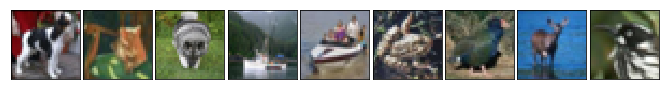

In [5]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [6]:
model = Sequential()

# 32x32x3
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
# 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))
# 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer='he_normal'))
# 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5x5x16
model.add(Flatten())
# 400
model.add(Dense(120, activation='relu', kernel_initializer='he_normal'))
# 120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))
# 84
model.add(Dense(10, activation='softmax'))
# 10

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


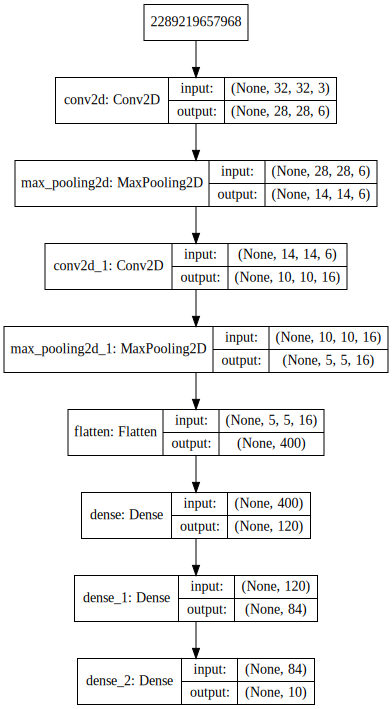

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x_train, y_train,
          batch_size=128, epochs=100, verbose=1,
          validation_data=(x_valid, y_valid),
          callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
40000/40000 [==============================] - 4s 107us/sample - loss: 1.7317 - acc: 0.3754 - val_loss: 1.5099 - val_acc: 0.4518
Epoch 2/100
40000/40000 [==============================] - 3s 71us/sample - loss: 1.4319 - acc: 0.4851 - val_loss: 1.3665 - val_acc: 0.5113
Epoch 3/100
40000/40000 [==============================] - 3s 71us/sample - loss: 1.3301 - acc: 0.5213 - val_loss: 1.3355 - val_acc: 0.5262
Epoch 4/100
40000/40000 [==============================] - 3s 73us/sample - loss: 1.2606 - acc: 0.5503 - val_loss: 1.2764 - val_acc: 0.5478
Epoch 5/100
40000/40000 [==============================] - 3s 72us/sample - loss: 1.2025 - acc: 0.5721 - val_loss: 1.2616 - val_acc: 0.5488
Epoch 6/100
40000/40000 [==============================] - 3s 70us/sample - loss: 1.1507 - acc: 0.5920 - val_loss: 1.2126 - val_acc: 0.5701
Epoch 7/100
40000/40000 [==============================] - 3s

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1864906604766845
Test accuracy: 0.5804


In [10]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False)

In [11]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 15s 37ms/step - loss: 1.4519 - acc: 0.4817 - val_loss: 1.4806 - val_acc: 0.5042
Epoch 2/30
400/400 [==============================] - 15s 37ms/step - loss: 1.3985 - acc: 0.5006 - val_loss: 1.2984 - val_acc: 0.5482
Epoch 3/30
400/400 [==============================] - 15s 38ms/step - loss: 1.3709 - acc: 0.5106 - val_loss: 1.2492 - val_acc: 0.5650
Epoch 4/30
400/400 [==============================] - 17s 42ms/step - loss: 1.3494 - acc: 0.5164 - val_loss: 1.1685 - val_acc: 0.5857
Epoch 5/30
400/400 [==============================] - 17s 44ms/step - loss: 1.3181 - acc: 0.5283 - val_loss: 1.1648 - val_acc: 0.5920
Epoch 6/30
400/400 [==============================] - 17s 42ms/step - loss: 1.3113 - acc: 0.5320 - val_loss: 1.2320 - val_acc: 0.5754
Epoch 7/30
400/400 [==============================] - 22s 54ms/step - loss: 1.2971 - acc: 0.5334 - val_loss: 1.1345 - val_acc: 0.5984
Epoch 8/30
400/400 [==============================] - 18s 46ms

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss with data augmentation:', score[0])
print('Test accuracy with data augmentation:', score[1])

Test loss with data augmentation: 1.0099852146148682
Test accuracy with data augmentation: 0.6444
